SDS Datathon

Name: Aryan Wadhwa
SRN: PES2UG21CS098
Section: B

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.graphics.gofplots as sm
import pandas as pd
import random
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [27]:
df = pd.read_csv(r"C:\Users\Aryan Wadhwa\OneDrive\Desktop\SDS Datathon prep\landslides.csv")

1. Data Processing 

a) Plotting HeatMap of NULL Values

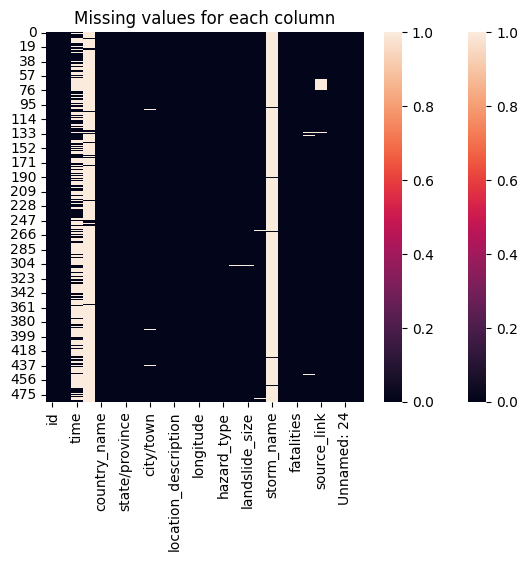

In [3]:
# Visualize missing values using heatmap
sns.heatmap(df.isnull())
plt.title("Missing values for each column")
sns.heatmap(df.isnull())
plt.show()

b) Find the number of outliers in each numeric column and remove them

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
numeric_df

,id,population,distance,latitude,longitude,injuries,fatalities,Unnamed: 24,Unnamed: 25
0,5743,3822,7.31418,40.2205,-81.5529,0,0,2014,1
1,5744,1424,13.70206,35.3991,-83.5909,0,0,2014,1
2,5754,2184,2.38605,15.4210,-61.4285,0,0,2014,1
3,5777,305704,1.31322,40.4290,-79.9988,0,0,2014,1
4,5785,9643,1.87113,40.3865,-79.9675,0,0,2014,1
...,...,...,...,...,...,...,...,...,...
480,7535,1646,7.80866,35.2219,-82.3226,0,0,2015,12
481,7537,51400,6.84721,38.3987,-81.5848,0,0,2016,2
482,7539,2406,14.19735,37.4096,-81.4268,0,0,2016,2
483,7540,1048,12.00678,37.5011,-81.1093,0,0,2016,2


In [5]:
categorical_df = df.select_dtypes(include='object')
categorical_df

,date,time,continent_code,country_name,country_code,state/province,city/town,location_description,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,source_name,source_link,Unnamed: 23
0,01-02-2014,****,NaN,United States,US,Ohio,Newcomerstown,Below road,"(40.220500000000001, -81.552899999999994)",Landslide,Landslide,Medium,Unknown,NaN,New Philadelphia Times Reporter,http://www.timesreporter.com/article/20140102/...,02-01-2014
1,01-02-2014,NaN,NaN,United States,US,North Carolina,Bryson City,Unknown,"(35.399099999999997, -83.590900000000005)",Landslide,Landslide,Medium,unknown,NaN,Citizen-Times.com,http://blogs2.citizen-times.com/outdoors/2014/...,02-01-2014
2,01-07-2014,Morning,NaN,Dominica,DM,Saint Joseph,Saint Joseph,Above road,"(15.420999999999999, -61.4285)",Landslide,Landslide,Medium,unknown,NaN,DaVibes The Caribbean News Portal,http://dominicavibes.dm/colihaut-men-escape-la...,07-01-2014
3,1/14/14,Morning,NaN,United States,US,Pennsylvania,Pittsburgh,Above road,"(40.429000000000002, -79.998800000000003)",Landslide,Landslide,Medium,unknown,NaN,TribLive News,http://triblive.com/news/adminpage/5416840-74/...,14-01-2014
4,1/14/14,Morning,NaN,United States,US,Pennsylvania,Brentwood,Natural slope,"(40.386499999999998, -79.967500000000001)",Landslide,Landslide,Medium,unknown,NaN,TribLive Neighborhoods,http://triblive.com/neighborhoods/yoursouthhil...,14-01-2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,12-07-2015,NaN,NaN,United States,US,North Carolina,Tryon,Above road,"(35.221899999999998, -82.322599999999994)",Landslide,Rockfall,Small,NaN,NaN,Tryon Daily Bulletin,http://www.tryondailybulletin.com/2016/02/26/u...,07-12-2015
481,2/22/16,00:00,NaN,United States,US,West Virginia,Charleston,Natural slope,"(38.398699999999998, -81.584800000000001)",Landslide,Mudslide,Small,Unknown,NaN,Charleston Gazette,http://www.wvgazettemail.com/news/20160222/us-...,22-02-2016
482,2/23/16,NaN,NaN,United States,US,West Virginia,Welch,Above road,"(37.409599999999998, -81.4268)",Landslide,Landslide,Small,Rain,NaN,Bluefield Daily Telegraph,http://www.bdtonline.com/news/officials-cautio...,23-02-2016
483,2/26/16,21:06,NaN,United States,US,West Virginia,Athens,Above road,"(37.501100000000001, -81.109300000000005)",Landslide,Rockfall,Small,Unknown,NaN,Bluefield Daily Telegraph,http://www.bdtonline.com/news/rockslide-snarls...,26-02-2016


In [7]:
#Printing the the 
for (columnName, columnData) in numeric_df.iteritems():
   avg = columnData.mean()
   std_dev = columnData.std()
   print('Column Name : ', columnName)
   print('Number of NUll values : ', columnData.isnull().sum())
   print('Number of Outliers : ',((columnData < (avg - 2 * std_dev)) |(columnData > (avg + 2 * std_dev))).sum())
   print("-----------------------------")

Column Name :  id
Number of NUll values :  0
Number of Outliers :  5
-----------------------------
Column Name :  population
Number of NUll values :  0
Number of Outliers :  21
-----------------------------
Column Name :  distance
Number of NUll values :  0
Number of Outliers :  26
-----------------------------
Column Name :  latitude
Number of NUll values :  0
Number of Outliers :  9
-----------------------------
Column Name :  longitude
Number of NUll values :  0
Number of Outliers :  40
-----------------------------
Column Name :  injuries
Number of NUll values :  0
Number of Outliers :  6
-----------------------------
Column Name :  fatalities
Number of NUll values :  0
Number of Outliers :  2
-----------------------------
Column Name :  Unnamed: 24
Number of NUll values :  0
Number of Outliers :  19
-----------------------------
Column Name :  Unnamed: 25
Number of NUll values :  0
Number of Outliers :  0
-----------------------------


c) Removing the Outliers

In [8]:
#Removing the outliers
avg = numeric_df.mean()
std_dev = numeric_df.std()
outlier_df = ((numeric_df < (avg - 2 * std_dev)) |(numeric_df > (avg + 2 * std_dev)))
outlier_df

,id,population,distance,latitude,longitude,injuries,fatalities,Unnamed: 24,Unnamed: 25
0,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
480,False,False,False,False,False,False,False,False,False
481,False,False,False,False,False,False,False,True,False
482,False,False,False,False,False,False,False,True,False
483,False,False,False,False,False,False,False,True,False


In [9]:
final_df = pd.concat([categorical_df, outlier_df], axis=1)
outliers_in_rows = []
for index,row in outlier_df.iterrows():
   outliers_in_rows.append(row.sum())

print(len(outliers_in_rows))

485


In [10]:
final_df['value'] = outliers_in_rows
final_df_without_outliers= final_df.loc[final_df['value'] == 0]
print(final_df_without_outliers.shape)

(368, 27)


In [11]:
final_df_outliers = final_df.loc[final_df['value'] != 0]
arr = []
for i,r in final_df_outliers.iterrows():
   arr.append(i)
df_without_outliers = df.drop(df.index[arr])

In [12]:
total_missing_values = df_without_outliers.isnull().sum()
missing_values_per_column = df_without_outliers.isnull().sum()/df_without_outliers.isnull().count()
null_values = pd.concat([total_missing_values, missing_values_per_column], axis=1, keys=['total_null', 'total_null_perc'])
null_values = null_values.sort_values('total_null', ascending=False)
print(null_values)

                      total_null  total_null_perc
storm_name                   363         0.986413
continent_code               359         0.975543
time                         224         0.608696
city/town                      3         0.008152
source_link                    2         0.005435
source_name                    2         0.005435
trigger                        2         0.005435
landslide_type                 1         0.002717
location_description           1         0.002717
landslide_size                 1         0.002717
id                             0         0.000000
Unnamed: 24                    0         0.000000
Unnamed: 23                    0         0.000000
fatalities                     0         0.000000
injuries                       0         0.000000
geolocation                    0         0.000000
hazard_type                    0         0.000000
date                           0         0.000000
longitude                      0         0.000000


In [13]:
NA_val = df_without_outliers.isna().sum();
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df_without_outliers.shape[0] < threshold:
            col_pass.append(i)
    return col_pass
df_cleaned = df_without_outliers[na_filter(NA_val)]
print(df_cleaned.columns)

Index(['id', 'date', 'country_name', 'country_code', 'state/province',
       'population', 'city/town', 'distance', 'location_description',
       'latitude', 'longitude', 'geolocation', 'hazard_type', 'landslide_type',
       'landslide_size', 'trigger', 'injuries', 'fatalities', 'source_name',
       'source_link', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


In [14]:
print(len(df_without_outliers.columns),len(df_cleaned.columns))

26 23


In [15]:
print(df_cleaned.isnull().sum())

id                      0
date                    0
country_name            0
country_code            0
state/province          0
population              0
city/town               3
distance                0
location_description    1
latitude                0
longitude               0
geolocation             0
hazard_type             0
landslide_type          1
landslide_size          1
trigger                 2
injuries                0
fatalities              0
source_name             2
source_link             2
Unnamed: 23             0
Unnamed: 24             0
Unnamed: 25             0
dtype: int64


In [16]:
duplicate = df_cleaned.duplicated();
print(duplicate.sum());

# remove duplicates
df_cleaned.drop_duplicates(inplace=True);
dp1=df_cleaned.duplicated();
print(dp1.sum());

0
0


C:\Users\Aryan Wadhwa\AppData\Local\Temp\ipykernel_1836\3613117798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop_duplicates(inplace=True);


In [17]:
df_cleaned.head()

,id,date,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,...,landslide_type,landslide_size,trigger,injuries,fatalities,source_name,source_link,Unnamed: 23,Unnamed: 24,Unnamed: 25
5,5841,02-05-2014,United States,US,Kentucky,6845,Morehead,10.34977,Above road,38.1181,...,Landslide,Medium,Rain,0,0,Lex18.com,http://www.lex18.com/news/mudslide-shuts-down-...,05-02-2014,2014,2
6,5842,02-05-2014,United States,US,Kentucky,3255,Prestonsburg,13.34216,Above road,37.5455,...,Mudslide,Medium,unknown,0,0,WYMT TV 57 Mountain news,http://www.wkyt.com/wymt/home/headlines/Mudsli...,05-02-2014,2014,2
9,5871,2/15/14,Bermuda,BM,Hamilton city,902,Hamilton,0.89751,Above road,32.3032,...,Landslide,Medium,Downpour,0,0,BDA Sun,http://www.bermudasun.bm/Content/NEWS/News/Art...,15-02-2014,2014,2
10,5888,2/21/14,United States,US,Kentucky,4407,Ludlow,1.22118,Above road,39.0963,...,Mudslide,medium,Continuous rain,0,0,Cincinnati's WLWT 5,http://www.wlwt.com/news/local-news/cincinnati...,21-02-2014,2014,2
11,5893,2/22/14,United States,US,Kentucky,3255,Prestonsburg,11.74439,Above road,37.5927,...,Mudslide,Medium,Snowfall snowmelt,0,0,WYMT TV 57 Mountain news,http://www.wkyt.com/wymt/home/headlines/Some-F...,22-02-2014,2014,2


d) Plot a Correlation Matrix

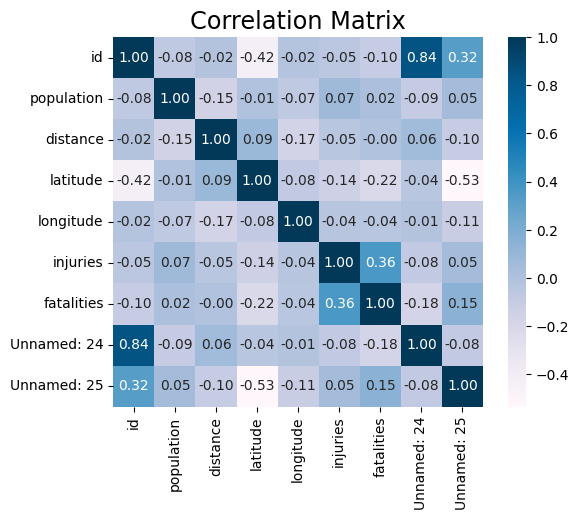

In [18]:
dataCorr = df_cleaned.corr()
plt.figure()
plt.title('Correlation Matrix', fontsize="xx-large")
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'PuBu')
plt.show()

In [19]:
print(df_cleaned.shape)
df_cleaned.mean()


(368, 23)


C:\Users\Aryan Wadhwa\AppData\Local\Temp\ipykernel_1836\1169337342.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_cleaned.mean()


id              6867.296196
population     29206.201087
distance           5.479064
latitude          27.183514
longitude        -85.736889
injuries           0.089674
fatalities         0.241848
Unnamed: 24     2014.611413
Unnamed: 25        6.578804
dtype: float64

In [21]:
from sklearn.preprocessing import MinMaxScaler
col = ['population', 'distance']
data = df_cleaned[col]
s = data.values.astype(float)
min_max_scaler = MinMaxScaler(feature_range=(0,1))
s_scaled = min_max_scaler.fit_transform(s)
df_normalized = pd.DataFrame(s_scaled, columns=col,index=df_cleaned.index)
df_normalized = df_normalized.rename(columns={'population':'n_population', 'distance':'n_distance'})
df_cleaned = pd.concat([df_cleaned, df_normalized],axis=1)
df_cleaned

,id,date,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,...,trigger,injuries,fatalities,source_name,source_link,Unnamed: 23,Unnamed: 24,Unnamed: 25,n_population,n_distance
5,5841,02-05-2014,United States,US,Kentucky,6845,Morehead,10.34977,Above road,38.1181,...,Rain,0,0,Lex18.com,http://www.lex18.com/news/mudslide-shuts-down-...,05-02-2014,2014,2,0.014469,0.400918
6,5842,02-05-2014,United States,US,Kentucky,3255,Prestonsburg,13.34216,Above road,37.5455,...,unknown,0,0,WYMT TV 57 Mountain news,http://www.wkyt.com/wymt/home/headlines/Mudsli...,05-02-2014,2014,2,0.006880,0.516834
9,5871,2/15/14,Bermuda,BM,Hamilton city,902,Hamilton,0.89751,Above road,32.3032,...,Downpour,0,0,BDA Sun,http://www.bermudasun.bm/Content/NEWS/News/Art...,15-02-2014,2014,2,0.001907,0.034766
10,5888,2/21/14,United States,US,Kentucky,4407,Ludlow,1.22118,Above road,39.0963,...,Continuous rain,0,0,Cincinnati's WLWT 5,http://www.wlwt.com/news/local-news/cincinnati...,21-02-2014,2014,2,0.009316,0.047304
11,5893,2/22/14,United States,US,Kentucky,3255,Prestonsburg,11.74439,Above road,37.5927,...,Snowfall snowmelt,0,0,WYMT TV 57 Mountain news,http://www.wkyt.com/wymt/home/headlines/Some-F...,22-02-2014,2014,2,0.006880,0.454941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,7516,10/21/15,Mexico,MX,Chiapas,18608,Emiliano Zapata,4.68443,Below road,17.7055,...,Rain,0,0,azteca noticias,http://www.aztecanoticias.com.mx/notas/estados...,21-10-2015,2015,10,0.039334,0.181460
464,7517,09-12-2015,Mexico,MX,Chiapas,6089,Tila,1.73469,Below road,17.3112,...,Rain,0,0,NVI noticias,http://www.noticiasnet.mx/portal/chiapas/gener...,12-09-2015,2015,9,0.012871,0.067196
465,7518,10/15/15,Mexico,MX,Tabasco,32415,Tenosique de Pino Suárez,15.22260,Below road,17.4054,...,Flooding,0,0,ver tiente global,http://vertienteglobal.com/?p=49401,15-10-2015,2015,10,0.068519,0.589677
479,7534,11/29/15,United States,US,North Carolina,1646,Tryon,7.69666,Above road,35.2207,...,Unknown,0,0,Tryon Daily Bulletin,http://www.tryondailybulletin.com/2016/02/26/u...,29-11-2015,2015,11,0.003479,0.298144


d) Normalize the following columns - population, distance

population


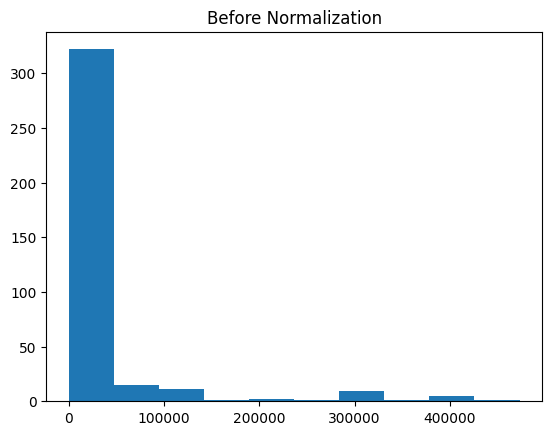

distance


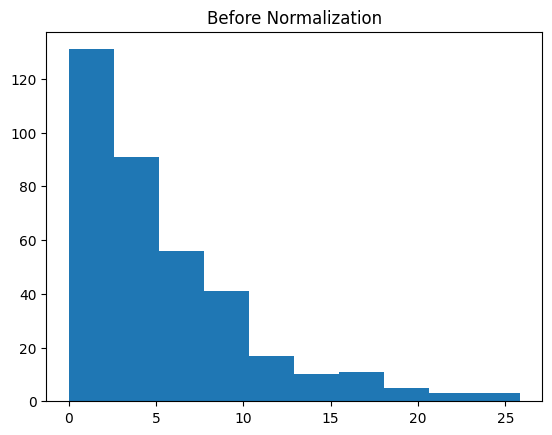

In [22]:
data = df_cleaned[['population','distance']]
for i in data:
    print(i)
    plt.hist(df_cleaned[i])
    plt.title('Before Normalization')
    plt.show()

n_population


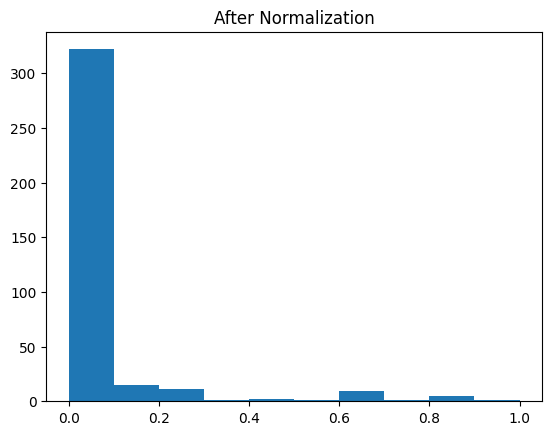

n_distance


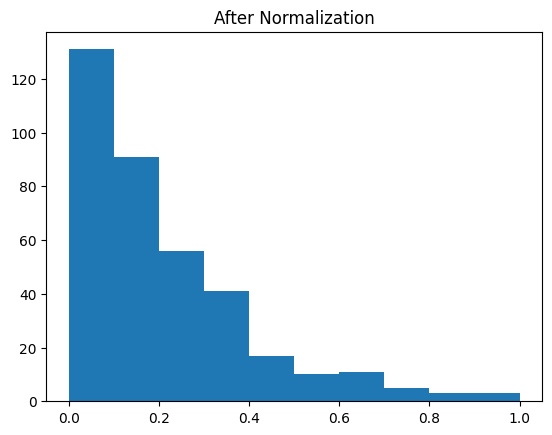

In [23]:
data = df_cleaned[['n_population', 'n_distance']]
for i in data:
    print(i)
    plt.hist(df_normalized[i])
    plt.title('After Normalization')
    plt.show()

In [24]:
print('Mean:')
print(df_normalized.mean().round(decimals=1))
print('--------------------------')
print('Median:')
print(df_normalized.median().round(decimals=1))
print('--------------------------')
print('Variance:')
print(df_normalized.var().round(decimals=1))
print('--------------------------')

Mean:
n_population    0.1
n_distance      0.2
dtype: float64
--------------------------
Median:
n_population    0.0
n_distance      0.1
dtype: float64
--------------------------
Variance:
n_population    0.0
n_distance      0.0
dtype: float64
--------------------------


2. Data Visualization

a) Plot a pie chart of ‘landslide_size’ frequency

<AxesSubplot:ylabel='landslide_size'>

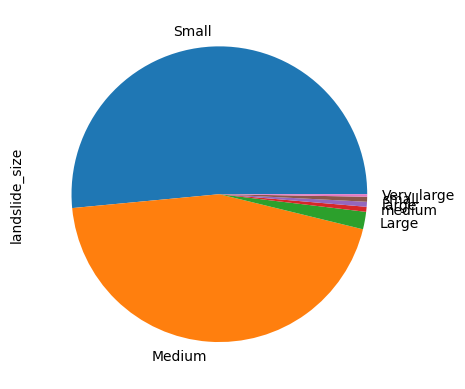

In [30]:
df_cleaned['landslide_size'].value_counts().plot(kind='pie')

b) Plot a barplot of ‘country_name’ frequency.

<AxesSubplot:>

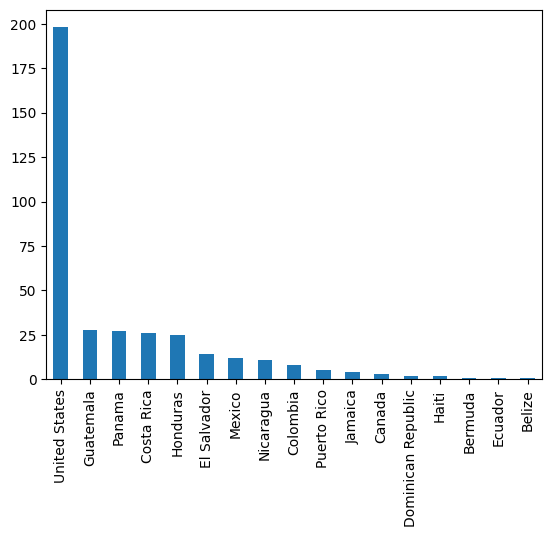

In [31]:
df_cleaned['country_name'].value_counts().plot(kind='bar')

3) Hypothesis testing

a) Use df['distance'] as population and a sample of 'landslide_size' == ‘Large’ and test whether the average distance covered by large landslides differs from the population using the one-sample t-test method.

In [32]:
pop1 = df_cleaned
pop2 = df_cleaned.loc[df_cleaned['landslide_size'] == 'Large']

In [34]:
print(pop1['distance'].mean())
print(pop2['distance'].mean())

5.479064048913044
6.7022514285714285


In [37]:
stats.ttest_1samp(a = pop2['distance'], popmean = pop1['distance'].mean())

Ttest_1sampResult(statistic=0.5222920057760747, pvalue=0.6201812865573284)

In [44]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=484)  #

-1.9648774427291587

In [45]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=484)

1.9648774427291582

As we can see that the test statistic = 0.5222920057760747  lies within the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, so **We do not reject the Null Hypothesis.**

In [47]:
stats.t.cdf(x= 0.5222920057760747,      # T-test statistic
               df= 487) * 2   # Multiply by two for two tailed test *

1.398295476097442

Inference from a)  
From the test statistic, we conclude that the NULL Hypothesis is not rejected, hence we can say that the Distance sample does not differ from the population.

b) Use df['distance'] as population and samples of landslides triggered by ‘Rain’ and ‘Downpour’ and perform a two-sample t-test.

In [58]:
pop1 = df_cleaned.loc[df_cleaned['trigger'] == 'Rain']
pop2 = df_cleaned.loc[df_cleaned['trigger'] == 'Downpour']

In [59]:
stats.ttest_ind(a= pop1['distance'],
                b= pop2['distance'],
                equal_var=False) 

Ttest_indResult(statistic=-0.01569259297418922, pvalue=0.987497706604624)

the test yields a p-value of 0.98749, which means there is a 98.749% chance we'd see sample data this far apart if the two groups tested are actually identical.

4. Model Building

a) Build a linear regression model for x=’distance’, y=’population’.

In [63]:
lr = df_cleaned.loc[df_cleaned['landslide_size'] == 'Small']
lr

,id,date,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,...,trigger,injuries,fatalities,source_name,source_link,Unnamed: 23,Unnamed: 24,Unnamed: 25,n_population,n_distance
25,5967,3/20/14,United States,US,Connecticut,51384,Stratford,0.76857,Above road,41.2008,...,Continuous rain,0,0,News 12 Connecticut,http://connecticut.news12.com/news/mudslide-bl...,20-03-2014,2014,3,0.108616,0.029771
27,5977,3/29/14,United States,US,New York,2244,Nedrow,7.01558,Unknown,42.9429,...,Rain,0,0,Syracuse,http://www.syracuse.com/news/index.ssf/2014/04...,29-03-2014,2014,3,0.004743,0.271761
28,5981,04-04-2014,United States,US,Kentucky,3938,Carrollton,5.24704,Unknown,38.6890,...,Rain,0,0,Madison Courier,http://madisoncourier.com/main.asp?SectionID=4...,04-04-2014,2014,4,0.008324,0.203253
29,5983,04-06-2014,United States,US,Kentucky,3938,Carrollton,5.11169,Unknown,38.6914,...,Rain,0,0,Madison Courier,http://madisoncourier.com/main.asp?SectionID=4...,06-04-2014,2014,4,0.008324,0.198010
30,5985,04-07-2014,United States,US,Alabama,34033,Vestavia Hills,0.90573,Above road,33.4407,...,Downpour,0,0,WIAT,http://wiat.com/2014/04/07/mudslide-causes-pro...,07-04-2014,2014,4,0.071939,0.035084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,7497,6/29/15,Panama,PA,Bocas del Toro,22900,Changuinola,5.97977,Above road,9.3880,...,Downpour,0,0,La Prensa,http://www.prensa.com/provincias/Continuan-fue...,29-06-2015,2015,6,0.048406,0.231637
446,7499,12/21/15,Panama,PA,Bocas del Toro,0,Pueblo Nuevo,3.92621,Above road,8.8543,...,Rain,0,0,Panama America,http://www.panamaamerica.com.pa/provincias/des...,21-12-2015,2015,12,0.000000,0.152088
448,7501,10-08-2015,Panama,PA,Bocas del Toro,0,Cauchero,4.45630,Above road,9.1261,...,Rain,0,0,Mi Diario,http://m.midiario.com/uhora/nacionales/se-regi...,08-10-2015,2015,10,0.000000,0.172623
454,7507,11-11-2015,Panama,PA,Chiriquí,2823,Monte Lirio,6.74338,Above road,8.8330,...,Downpour,0,0,Bugaba,http://www.soydebugaba.com/noticias/fuertes-ll...,11-11-2015,2015,11,0.005967,0.261217


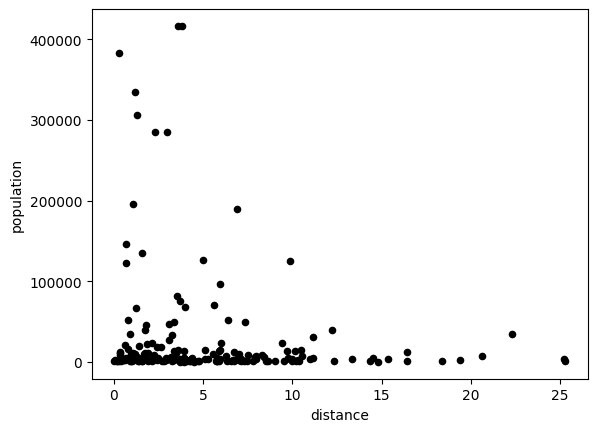

In [65]:
lr.plot(kind="scatter",
           x="distance",
           y="population",
           color="black");

In [71]:
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(lr["distance"]), 
                     y = lr["population"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

39633.91150597326
[-2214.08418796]


In [70]:
regression_model.score(X = pd.DataFrame(lr["distance"]), 
                       y = lr["population"])

0.022271613821229774

Inference from a)

1) The regression model is made with the follwing conclusions:

* y-intercept is 39633.91150597326 and the coefficient for the weight variable si -2214.08418796
the model will fit the line:
RushY = 39633.91150597326 + -2214.08418796  * 1stD

* 1stD explains roughly 2.2227% of the variance in RushY

B) Use the linear regression model to perform predictions.


In [72]:
pp = regression_model.predict(X = pd.DataFrame(lr["distance"]))

# Actual - prediction = residuals
residuals = lr["population"] - pp

residuals.describe()

count    1.890000e+02
mean    -1.847862e-12
std      6.995875e+04
min     -3.826709e+04
25%     -2.952049e+04
50%     -2.143857e+04
75%     -6.357945e+03
max      3.852395e+05
Name: population, dtype: float64

In [75]:
SSResiduals = (residuals**2).sum()

SSTotal = ((lr["distance"] - lr["population"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

-5.202511732647736

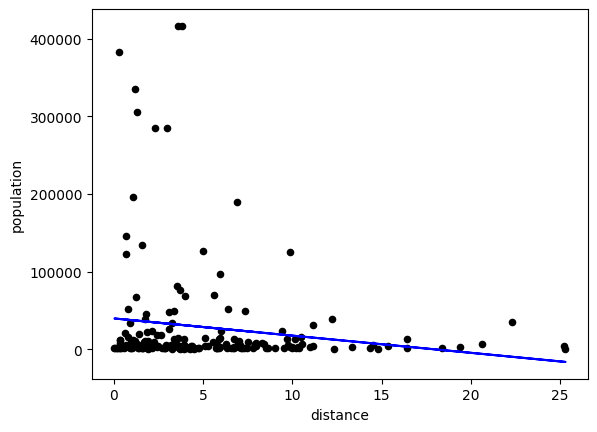

In [84]:
lr.plot(kind="scatter",
           x="distance",
           y="population",
           color="black")

# Plot regression line
plt.plot(lr["distance"],      # Explanitory variable
         pp,  # Predicted values
         color="blue");